## imports

In [60]:
!pip install phik
!pip install -U scikit-learn  

In [61]:
!pip list

Package                    Version
-------------------------- -----------
albumentations             1.3.0
anyio                      3.5.0
appnope                    0.1.2
argon2-cffi                21.3.0
argon2-cffi-bindings       21.2.0
asgiref                    3.5.2
asn1crypto                 1.5.1
asttokens                  2.0.5
attrs                      22.1.0
Babel                      2.11.0
backcall                   0.2.0
beautifulsoup4             4.11.1
bleach                     4.1.0
boto3                      1.24.28
botocore                   1.27.59
Bottleneck                 1.3.5
brotlipy                   0.7.0
catboost                   1.1.1
certifi                    2022.12.7
cffi                       1.15.1
charset-normalizer         2.0.4
click                      8.0.4
cloudpickle                2.2.1
comm                       0.1.2
contourpy                  1.0.5
cryptography               36.0.0
cycler                     0.11.0
debugpy            

In [62]:
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import phik
from phik.report import plot_correlation_matrix
from phik import report


# импорты модулей текущего проекта
# длина строки до 78 символов
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.model_selection import (
    GridSearchCV, 
    RandomizedSearchCV,
    train_test_split, cross_val_score
)

from sklearn import pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler
)
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
import warnings

from catboost import Pool, cv
from sklearn.metrics import RocCurveDisplay, roc_curve
# настройки
warnings.filterwarnings("ignore")

In [63]:
RANDOM_STATE = 150523 

def check_df(df, hue_type = None): 
    display(df.sample(5))
    display(df.info())
    display(df.describe())
    print('DUPLICATES', df.duplicated().sum())
    print('NULL VALUES: \n', df.isnull().sum())
    try:
        print('распределение признаков')
        sns.pairplot(df, hue = hue_type, diag_kind="kde")
        plt.show()
    except ValueError:
        print('датафрейм не подходит для построения pairplot')

In [64]:
!ls

57bb4a1f-2c9b-4e75-b452-00c8206dc72d.ipynb
628ab1a0-8a19-49ce-845c-997315a350c0.ipynb
catboost_info
contract_new.csv
internet_new.csv
personal_new.csv
phone_new.csv
telecom_churn.ipynb


## EDA

- personal_new.csv - персональные данные клиента
    - gender - пол
    - SeniorCitizen - наличие пенсионного статуса по возрасту
    - Partner - наличие супруга/супруги
    - Dependents - наличие иждивенцев
----------------------------------------------------------------

- contract_new.csv - информация о договоре
    - BeginDate - дата начала пользования услугами
    - EndDate - дата окончания пользования услугами
    - Type - тип договора: ежемесячный, годовой и т.д
    - PaperlessBilling - выставления счёта по электронной почте
    - PaymentMethod - способ оплаты
    - MonthlyCharges - ежемесячные траты на услуги
    - TotalCharges - всего потрачено денег на услуги
----------------------------------------------------------------

- internet_new.csv - информация об интернет-услугах
    - InternetService - наличие услуг Интернет
    - OnlineSecurity - межсетевой экран
    - OnlineBackup - облачное хранилище файлов для резервного копирования данных
    - DeviceProtection - антивирус
    - TechSupport - выделенная линия технической поддержки
    - StreamingTV - онлайн-ТВ
    - StreamingMovies - онлайн-кинотеатр
----------------------------------------------------------------

- phone_new.csv - информация об услугах телефонии
    - MultipleLines - возможность подключения телефонного аппарата к нескольким линиям одновременно
----------------------------------------------------------------

In [65]:
try:
    contract = pd.read_csv('/datasets/contract_new.csv')
    internet = pd.read_csv('/datasets/internet_new.csv')
    personal = pd.read_csv('/datasets/personal_new.csv')
    phone = pd.read_csv('/datasets/phone_new.csv')

except: 
    contract = pd.read_csv('contract_new.csv')
    internet = pd.read_csv('internet_new.csv')
    personal = pd.read_csv('personal_new.csv')
    phone = pd.read_csv('phone_new.csv')

### contract

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3944,4537-CIBHB,2019-05-01,No,One year,No,Mailed check,20.25,185.9
6419,3865-ZYKAD,2014-05-01,No,Month-to-month,Yes,Credit card (automatic),84.90,5858.1
5479,8990-ZXLSU,2019-05-01,No,Month-to-month,No,Electronic check,69.05,621.45
4505,6917-FIJHC,2014-02-01,2015-03-01,Two year,Yes,Mailed check,26.00,341.38
6122,7609-NRNCA,2018-09-01,No,One year,No,Mailed check,19.55,355.61


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 440.3+ KB


None

,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


DUPLICATES 0
NULL VALUES: 
 customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64
распределение признаков


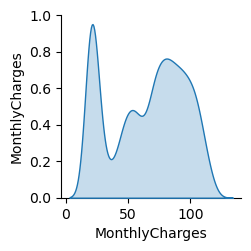

In [66]:
contract['BeginDate'] = contract['BeginDate'].astype('datetime64[D]')
check_df(contract)

первый датафрейм -- контракты. в некторых столбцах поплыл формат, его нужно поправить, целевой фичей оттока может стать EndDate, ее можно перенести в булевый флаг на этапе подгтовки датафрейма. 

In [67]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 440.3+ KB


In [68]:
contract['EndDate'] = contract['EndDate'].replace({'No':None}).astype('datetime64[D]')
contract['PaperlessBilling'] = contract['PaperlessBilling'].replace({'Yes':1, 'No':0})
contract = contract[contract['TotalCharges'] != ' ']
contract['TotalCharges'] = contract['TotalCharges'].astype('float64')

In [69]:
contract['churn'] = np.where(contract.EndDate.isnull(), 0, 1)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churn
1773,2007-QVGAW,2014-06-01,2018-12-01,Two year,1,Bank transfer (automatic),19.35,1044.90,1
5456,8718-PTMEZ,2018-12-01,NaT,Month-to-month,1,Electronic check,31.05,456.44,0
5425,4998-IKFSE,2017-08-01,NaT,Month-to-month,0,Electronic check,100.45,3013.50,0
644,8404-VLQFB,2018-11-01,NaT,Month-to-month,1,Electronic check,25.25,397.69,0
1306,0201-OAMXR,2014-01-01,2015-11-01,One year,0,Credit card (automatic),115.55,2592.94,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7032 non-null   object        
 1   BeginDate         7032 non-null   datetime64[ns]
 2   EndDate           1101 non-null   datetime64[ns]
 3   Type              7032 non-null   object        
 4   PaperlessBilling  7032 non-null   int64         
 5   PaymentMethod     7032 non-null   object        
 6   MonthlyCharges    7032 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
 8   churn             7032 non-null   int64         
dtypes: datetime64[ns](2), float64(2), int64(2), object(3)
memory usage: 549.4+ KB


None

,PaperlessBilling,MonthlyCharges,TotalCharges,churn
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.592719,64.798208,2118.621822,0.156570
std,0.491363,30.085974,2112.736199,0.363421
min,0.000000,18.250000,19.050000,0.000000
25%,0.000000,35.587500,439.745000,0.000000
50%,1.000000,70.350000,1345.275000,0.000000
75%,1.000000,89.862500,3239.317500,0.000000
max,1.000000,118.750000,9221.380000,1.000000


DUPLICATES 0
NULL VALUES: 
 customerID             0
BeginDate              0
EndDate             5931
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
churn                  0
dtype: int64
распределение признаков


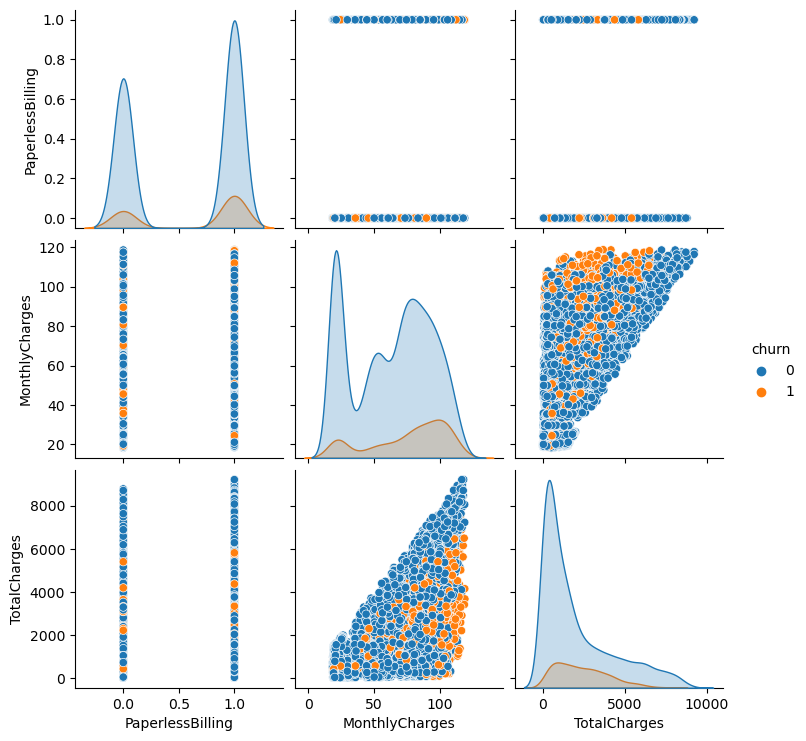

In [70]:
check_df(contract, 'churn')

прмоежуточные выводы: 

    - в отток чаще попадают билеты с электронным документооборотом и дорогим ежемесячным обслуживанием. 
    - теряем около 15% контрактов.
    - средняя цена обслуживания ~64 
    - ~60% клиентов работают по электронному документообороту


### internet

In [71]:
check_df(internet)

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
831,7296-PIXQY,Fiber optic,No,No,No,No,No,No
1633,3392-EHMNK,Fiber optic,No,Yes,No,Yes,Yes,No
109,3091-FYHKI,DSL,No,No,No,No,No,Yes
5174,4662-EKDPQ,DSL,No,No,No,No,No,Yes
1894,7389-KBFIT,DSL,No,Yes,No,No,No,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


None

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,7590-VHVEG,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


DUPLICATES 0
NULL VALUES: 
 customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64
распределение признаков
датафрейм не подходит для построения pairplot


In [72]:
internet.InternetService.value_counts()

Fiber optic    3096
DSL            2421
Name: InternetService, dtype: int64

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
1316,3761-FLYZI,Fiber optic,No,1,1,0,1,1
2751,5019-GQVCR,Fiber optic,No,0,0,0,1,0
3548,9058-CBREO,DSL,No,0,0,0,0,0
5363,8792-AOROI,DSL,Yes,0,0,1,0,1
1031,7993-PYKOF,Fiber optic,Yes,0,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   int64 
 4   DeviceProtection  5517 non-null   int64 
 5   TechSupport       5517 non-null   int64 
 6   StreamingTV       5517 non-null   int64 
 7   StreamingMovies   5517 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 344.9+ KB


None

,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517.000000,5517.000000,5517.000000,5517.000000,5517.000000
mean,0.440276,0.439007,0.370491,0.490665,0.495197
std,0.496465,0.496311,0.482980,0.499958,0.500022
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


DUPLICATES 0
NULL VALUES: 
 customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64
распределение признаков


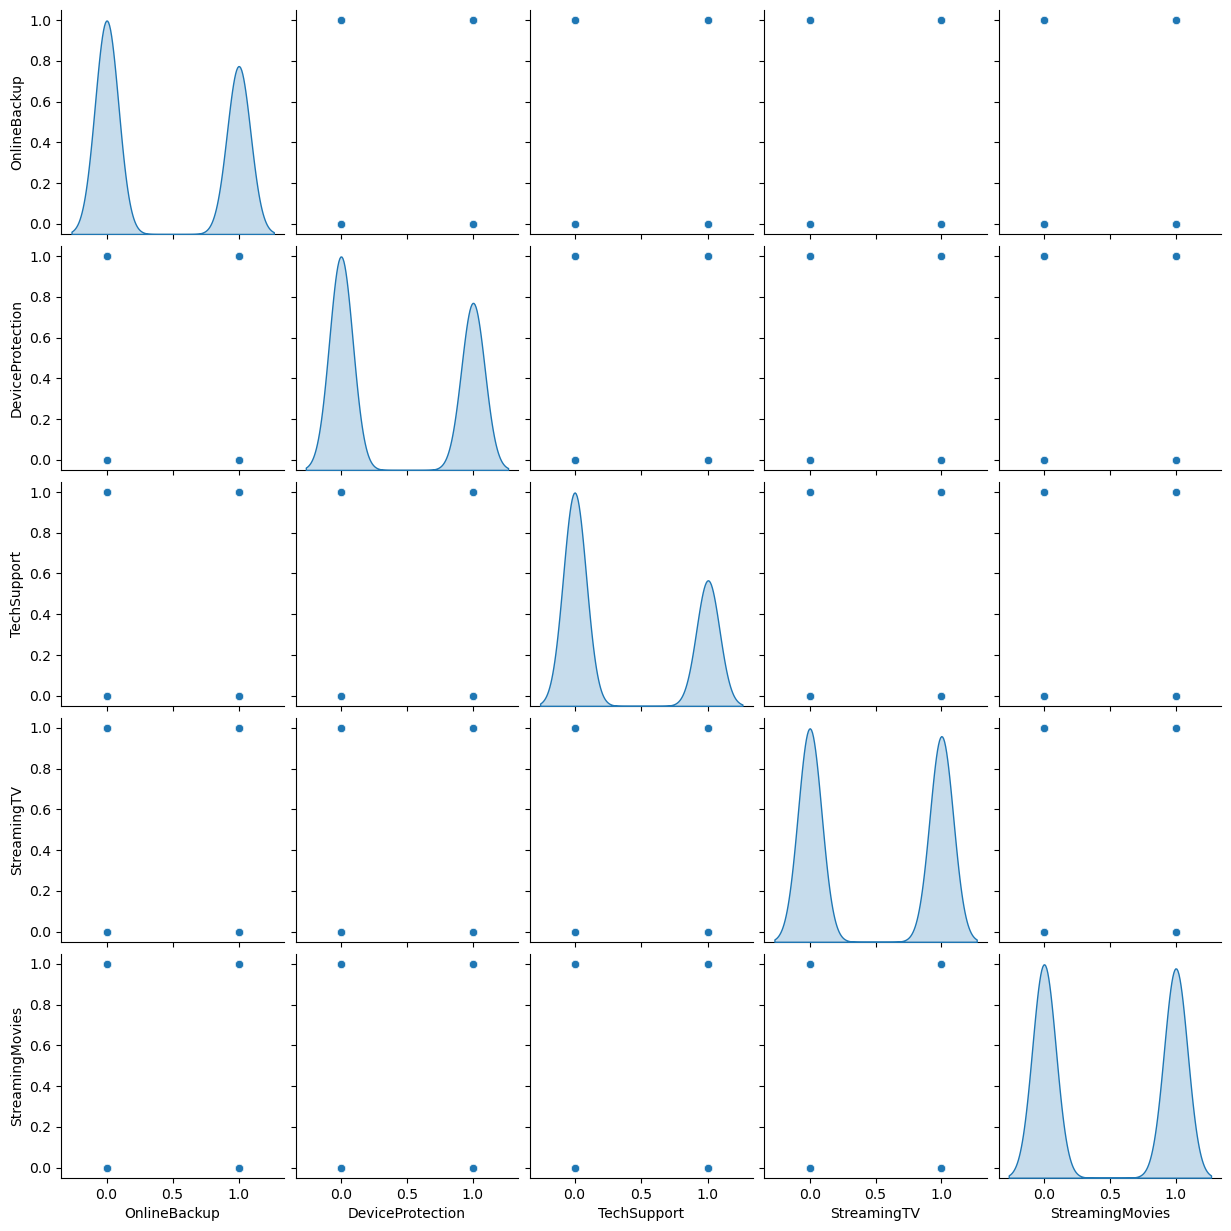

In [73]:
bool_cols = internet.drop(columns=['customerID', 'OnlineSecurity', 'InternetService'])

for bool_col in bool_cols:
    internet[bool_col] = internet[bool_col].replace({'Yes':1, 'No':0}).astype('int64')

check_df(internet)

промежуточные выводы по данным интернета: 

    - все услуги всречаются почти у половины клиентов 
    - DSL клиентов меньше, чем клиентов с оптикой
    - нет пропусков и дубликатов 

### personal

,customerID,gender,SeniorCitizen,Partner,Dependents
6218,8821-KVZKQ,Female,0,Yes,Yes
6367,0848-SOMKO,Male,0,No,No
4327,0958-YHXGP,Female,0,No,No
3796,8614-VGMMV,Female,0,No,No
1015,3863-IUBJR,Male,0,Yes,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


None

,SeniorCitizen
count,7043.000000
mean,0.162147
std,0.368612
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


DUPLICATES 0
NULL VALUES: 
 customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64
распределение признаков


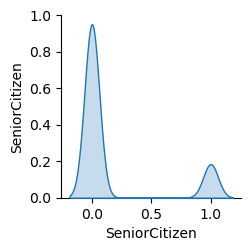

In [74]:
check_df(personal)

In [75]:
personal['gender'] = personal['gender'].replace({'Female':0, 'Male':1})
personal['Partner'] = personal['Partner'].replace({'No':0, 'Yes':1})
personal['Dependents'] = personal['Dependents'].replace({'No':0, 'Yes':1})

,customerID,gender,SeniorCitizen,Partner,Dependents
4728,6119-SPUDB,1,0,0,0
1401,5419-CONWX,0,1,0,0
1134,2208-NQBCT,0,0,1,1
2970,2815-CPTUL,1,1,0,0
4664,7571-YXDAD,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   int64 
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   int64 
 4   Dependents     7043 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 275.2+ KB


None

,gender,SeniorCitizen,Partner,Dependents
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588
std,0.500013,0.368612,0.499748,0.458110
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


DUPLICATES 0
NULL VALUES: 
 customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64
распределение признаков


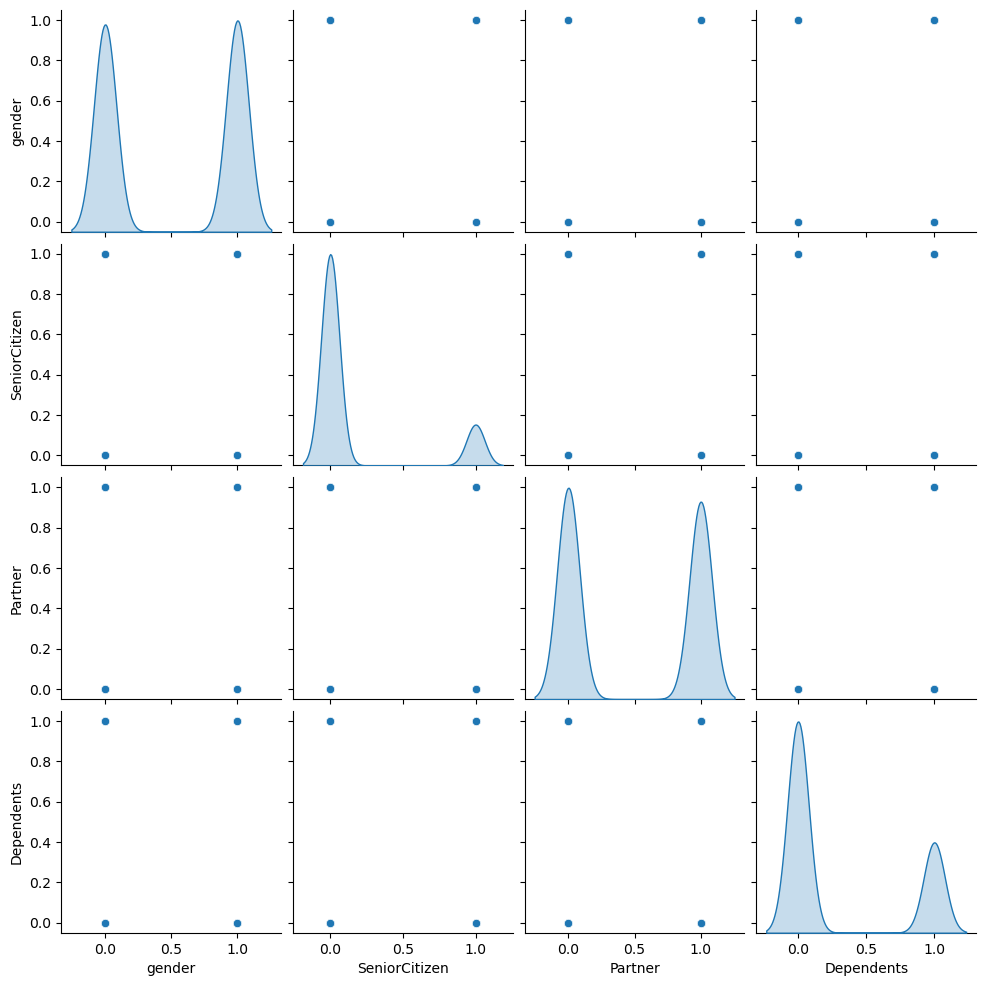

In [76]:
check_df(personal)

промежуточные выводы по персональным данным клинетов: 

    - у половины есть партнер 
    - пенсионеров около 16% 
    - у 30% есть иждивенцы 
    - мужчин и женщин примерно поровну 

### phone

In [77]:
phone['MultipleLines'] = phone['MultipleLines'].replace({'No':0, 'Yes':1}).astype('int64')

In [78]:
phone.MultipleLines.mean()

0.46706492689828644

у ~46% есть возмонжость подключения сразу нескольких линий 

# dataframe preprocessing

основной дф будет contarct, его можно обогатить через customer id всеми остальными датафреймами

In [79]:
contract.set_index('customerID')\
    .join(internet.set_index('customerID'), how = 'left')\
    .join(personal.set_index('customerID'), how = 'left')\
    .join(phone.set_index('customerID'), how = 'left')

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churn,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,2020-01-01,NaT,Month-to-month,1,Electronic check,29.85,31.04,0,DSL,No,1.0,0.0,0.0,0.0,0.0,0,0,1,0,NaN
5575-GNVDE,2017-04-01,NaT,One year,0,Mailed check,56.95,2071.84,0,DSL,Yes,0.0,1.0,0.0,0.0,0.0,1,0,0,0,0.0
3668-QPYBK,2019-10-01,NaT,Month-to-month,1,Mailed check,53.85,226.17,0,DSL,Yes,1.0,0.0,0.0,0.0,0.0,1,0,0,0,0.0
7795-CFOCW,2016-05-01,NaT,One year,0,Bank transfer (automatic),42.30,1960.60,0,DSL,Yes,0.0,1.0,1.0,0.0,0.0,1,0,0,0,NaN
9237-HQITU,2019-09-01,NaT,Month-to-month,1,Electronic check,70.70,353.50,0,Fiber optic,No,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,2018-02-01,NaT,One year,1,Mailed check,84.80,2035.20,0,DSL,Yes,0.0,1.0,1.0,1.0,1.0,1,0,1,1,1.0
2234-XADUH,2014-02-01,NaT,One year,1,Credit card (automatic),103.20,7430.40,0,Fiber optic,No,1.0,1.0,0.0,1.0,1.0,0,0,1,1,1.0
4801-JZAZL,2019-03-01,NaT,Month-to-month,1,Electronic check,29.60,325.60,0,DSL,Yes,0.0,0.0,0.0,0.0,0.0,0,0,1,1,NaN


In [80]:
df = contract.set_index('customerID')\
    .join(internet.set_index('customerID'), how = 'left')\
    .join(personal.set_index('customerID'), how = 'left')\
    .join(phone.set_index('customerID'), how = 'left').copy()

In [81]:
set(contract['customerID']).difference(set(df.index))

set()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churn,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines
3338,6347-DCUIK,2019-02-01,NaT,Month-to-month,1,Mailed check,74.15,952.09,0,Fiber optic,...,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1.0
2827,0635-WKOLD,2016-10-01,2019-10-01,One year,0,Credit card (automatic),70.75,2547.00,1,DSL,...,1.0,0.0,1.0,1.0,0.0,1,0,1,0,1.0
4364,3372-CDXFJ,2019-01-01,NaT,One year,0,Bank transfer (automatic),24.50,321.69,0,NaN,...,NaN,NaN,NaN,NaN,NaN,1,0,1,1,1.0
3098,9174-FKWZE,2019-11-01,NaT,Month-to-month,1,Electronic check,19.45,60.10,0,NaN,...,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0.0
4722,7813-ZGGAW,2017-07-01,NaT,Month-to-month,1,Bank transfer (automatic),96.60,3174.28,0,Fiber optic,...,0.0,1.0,1.0,1.0,0.0,1,1,0,0,1.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7032 non-null   object        
 1   BeginDate         7032 non-null   datetime64[ns]
 2   EndDate           1101 non-null   datetime64[ns]
 3   Type              7032 non-null   object        
 4   PaperlessBilling  7032 non-null   int64         
 5   PaymentMethod     7032 non-null   object        
 6   MonthlyCharges    7032 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
 8   churn             7032 non-null   int64         
 9   InternetService   5512 non-null   object        
 10  OnlineSecurity    5512 non-null   object        
 11  OnlineBackup      5512 non-null   float64       
 12  DeviceProtection  5512 non-null   float64       
 13  TechSupport       5512 non-null   float64       
 14  StreamingTV       5512 n

None

,PaperlessBilling,MonthlyCharges,TotalCharges,churn,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines
count,7032.000000,7032.000000,7032.000000,7032.000000,5512.000000,5512.000000,5512.000000,5512.000000,5512.000000,7032.000000,7032.000000,7032.000000,7032.000000,6352.000000
mean,0.592719,64.798208,2118.621822,0.156570,0.439949,0.438679,0.370102,0.490385,0.495464,0.504693,0.162400,0.482509,0.298493,0.467097
std,0.491363,30.085974,2112.736199,0.363421,0.496426,0.496271,0.482875,0.499953,0.500025,0.500014,0.368844,0.499729,0.457629,0.498955
min,0.000000,18.250000,19.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,35.587500,439.745000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,70.350000,1345.275000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,89.862500,3239.317500,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,118.750000,9221.380000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


DUPLICATES 0
NULL VALUES: 
 customerID             0
BeginDate              0
EndDate             5931
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
churn                  0
InternetService     1520
OnlineSecurity      1520
OnlineBackup        1520
DeviceProtection    1520
TechSupport         1520
StreamingTV         1520
StreamingMovies     1520
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
MultipleLines        680
dtype: int64
распределение признаков


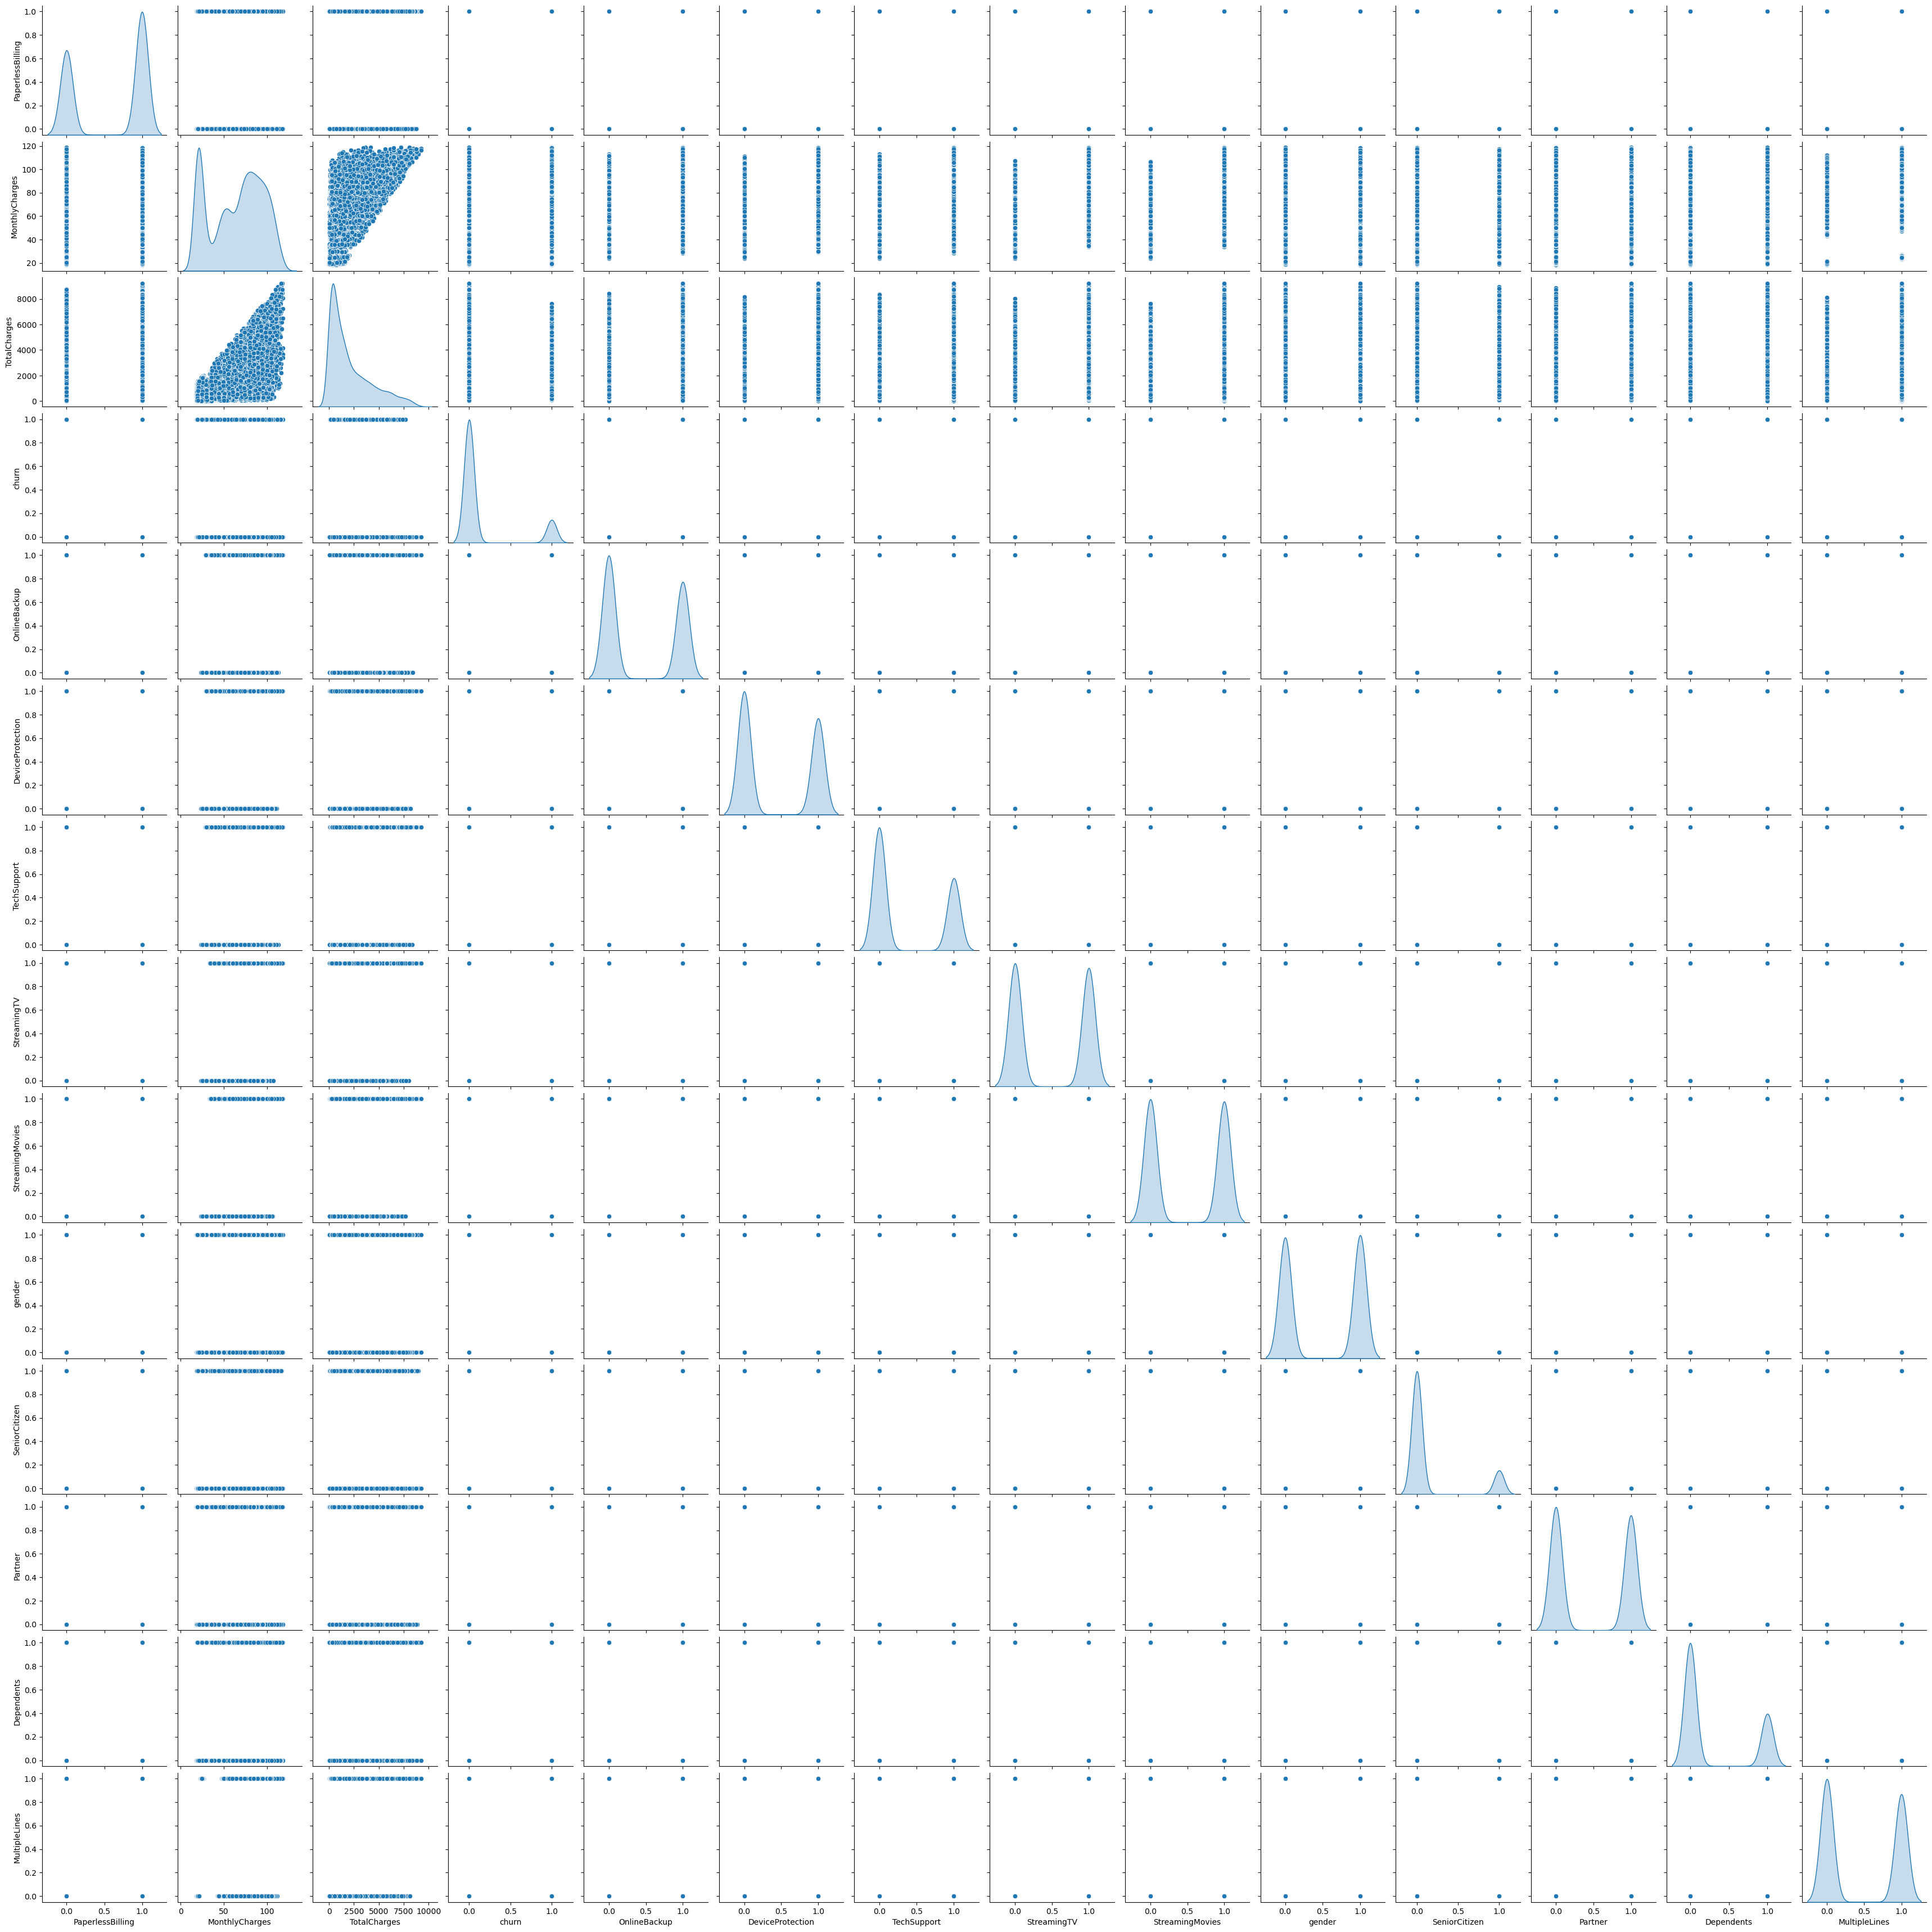

In [82]:
check_df(df.reset_index())

слишком ного пропусков в категорийных объектах, чтобы просто так от них избавляться, лучше присвоить значения по умолчанию вроде "unknown" 

## target research

In [83]:
df['EndDate'] = df['EndDate'].fillna('2020-02-01').astype('datetime64')

In [84]:
#сразу избавимся от утечки целевого признака
df['client_lifetime']  = df['EndDate'] -df['BeginDate'] 

<AxesSubplot: >

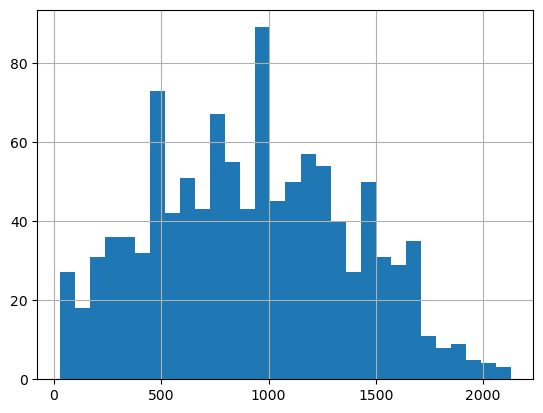

In [85]:
df.query('churn == 1')['client_lifetime'].dt.days.hist(bins = 30)

In [86]:
df.query('churn == 1')['client_lifetime'].describe()

count                           1101
mean     924 days 20:43:48.882833792
std      458 days 18:30:41.115260296
min                 28 days 00:00:00
25%                577 days 00:00:00
50%                915 days 00:00:00
75%               1249 days 00:00:00
max               2129 days 00:00:00
Name: client_lifetime, dtype: object

получается, что в среднем клиенты, которые попали в отток, живут окло 900 дней (медиана тоже не далеко ушла). 

In [87]:
#избавимся от утечки целевого признака
df = df.drop(columns=['EndDate'])

In [88]:
df['client_lifetime'] = df['client_lifetime'].dt.days

## nan values

In [89]:
display(df.isnull().sum())

for col in ['InternetService', 'OnlineSecurity', 
            'OnlineBackup', 'DeviceProtection', 
            'TechSupport','StreamingTV',
            'StreamingMovies', 'MultipleLines'] :
    df[col] = df[col].fillna(0)

df.isnull().sum()

BeginDate              0
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
churn                  0
InternetService     1520
OnlineSecurity      1520
OnlineBackup        1520
DeviceProtection    1520
TechSupport         1520
StreamingTV         1520
StreamingMovies     1520
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
MultipleLines        680
client_lifetime        0
dtype: int64

BeginDate           0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
churn               0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
MultipleLines       0
client_lifetime     0
dtype: int64

## features research

In [90]:
phik_overview = df.phik_matrix(interval_cols=['MonthlyCharges', 'TotalCharges', 'client_lifetime'])

In [91]:
phik_overview

,BeginDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churn,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines,client_lifetime
BeginDate,1.000000,0.765275,0.078664,0.467586,0.421848,0.773731,0.461977,0.185601,0.459336,0.457995,0.468675,0.410714,0.369979,0.381092,0.018540,0.049516,0.485513,0.201169,0.440017,0.978241
Type,0.765275,1.000000,0.106151,0.277528,0.388557,0.470700,0.094622,0.503776,0.636227,0.099016,0.137817,0.180169,0.067123,0.070375,0.000000,0.085800,0.179294,0.146126,0.065750,0.635623
PaperlessBilling,0.078664,0.106151,1.000000,0.368945,0.467547,0.202168,0.082789,0.231145,0.208084,0.196937,0.161234,0.055354,0.344114,0.325351,0.000000,0.241715,0.010489,0.170650,0.253299,0.018839
PaymentMethod,0.467586,0.277528,0.368945,1.000000,0.398849,0.334563,0.214300,0.323013,0.314888,0.282245,0.306678,0.270893,0.377241,0.378375,0.000000,0.291989,0.244661,0.222859,0.339987,0.348275
MonthlyCharges,0.421848,0.388557,0.467547,0.398849,1.000000,0.711015,0.225823,0.919005,0.812548,0.629276,0.667621,0.576163,0.835680,0.833111,0.005522,0.304546,0.204575,0.182283,0.676393,0.387649
TotalCharges,0.773731,0.470700,0.202168,0.334563,0.711015,1.000000,0.303758,0.489363,0.516500,0.623588,0.642431,0.550988,0.642937,0.644346,0.000000,0.136856,0.383135,0.085809,0.573224,0.847572
churn,0.461977,0.094622,0.082789,0.214300,0.225823,0.303758,1.000000,0.056279,0.058630,0.229736,0.218622,0.103933,0.200334,0.221756,0.008800,0.085708,0.227597,0.048710,0.261345,0.374101
InternetService,0.185601,0.503776,0.231145,0.323013,0.919005,0.489363,0.056279,1.000000,0.949461,0.233205,0.232532,0.239149,0.272629,0.272562,0.000000,0.160452,0.000000,0.107328,0.225602,0.058903
OnlineSecurity,0.459336,0.636227,0.208084,0.314888,0.812548,0.516500,0.058630,0.949461,1.000000,0.255133,0.252475,0.259930,0.255954,0.258983,0.000000,0.127108,0.091140,0.116236,0.128465,0.345964
OnlineBackup,0.457995,0.099016,0.196937,0.282245,0.629276,0.623588,0.229736,0.233205,0.255133,1.000000,0.457527,0.444385,0.427288,0.417200,0.007277,0.102206,0.219762,0.031464,0.311389,0.416097


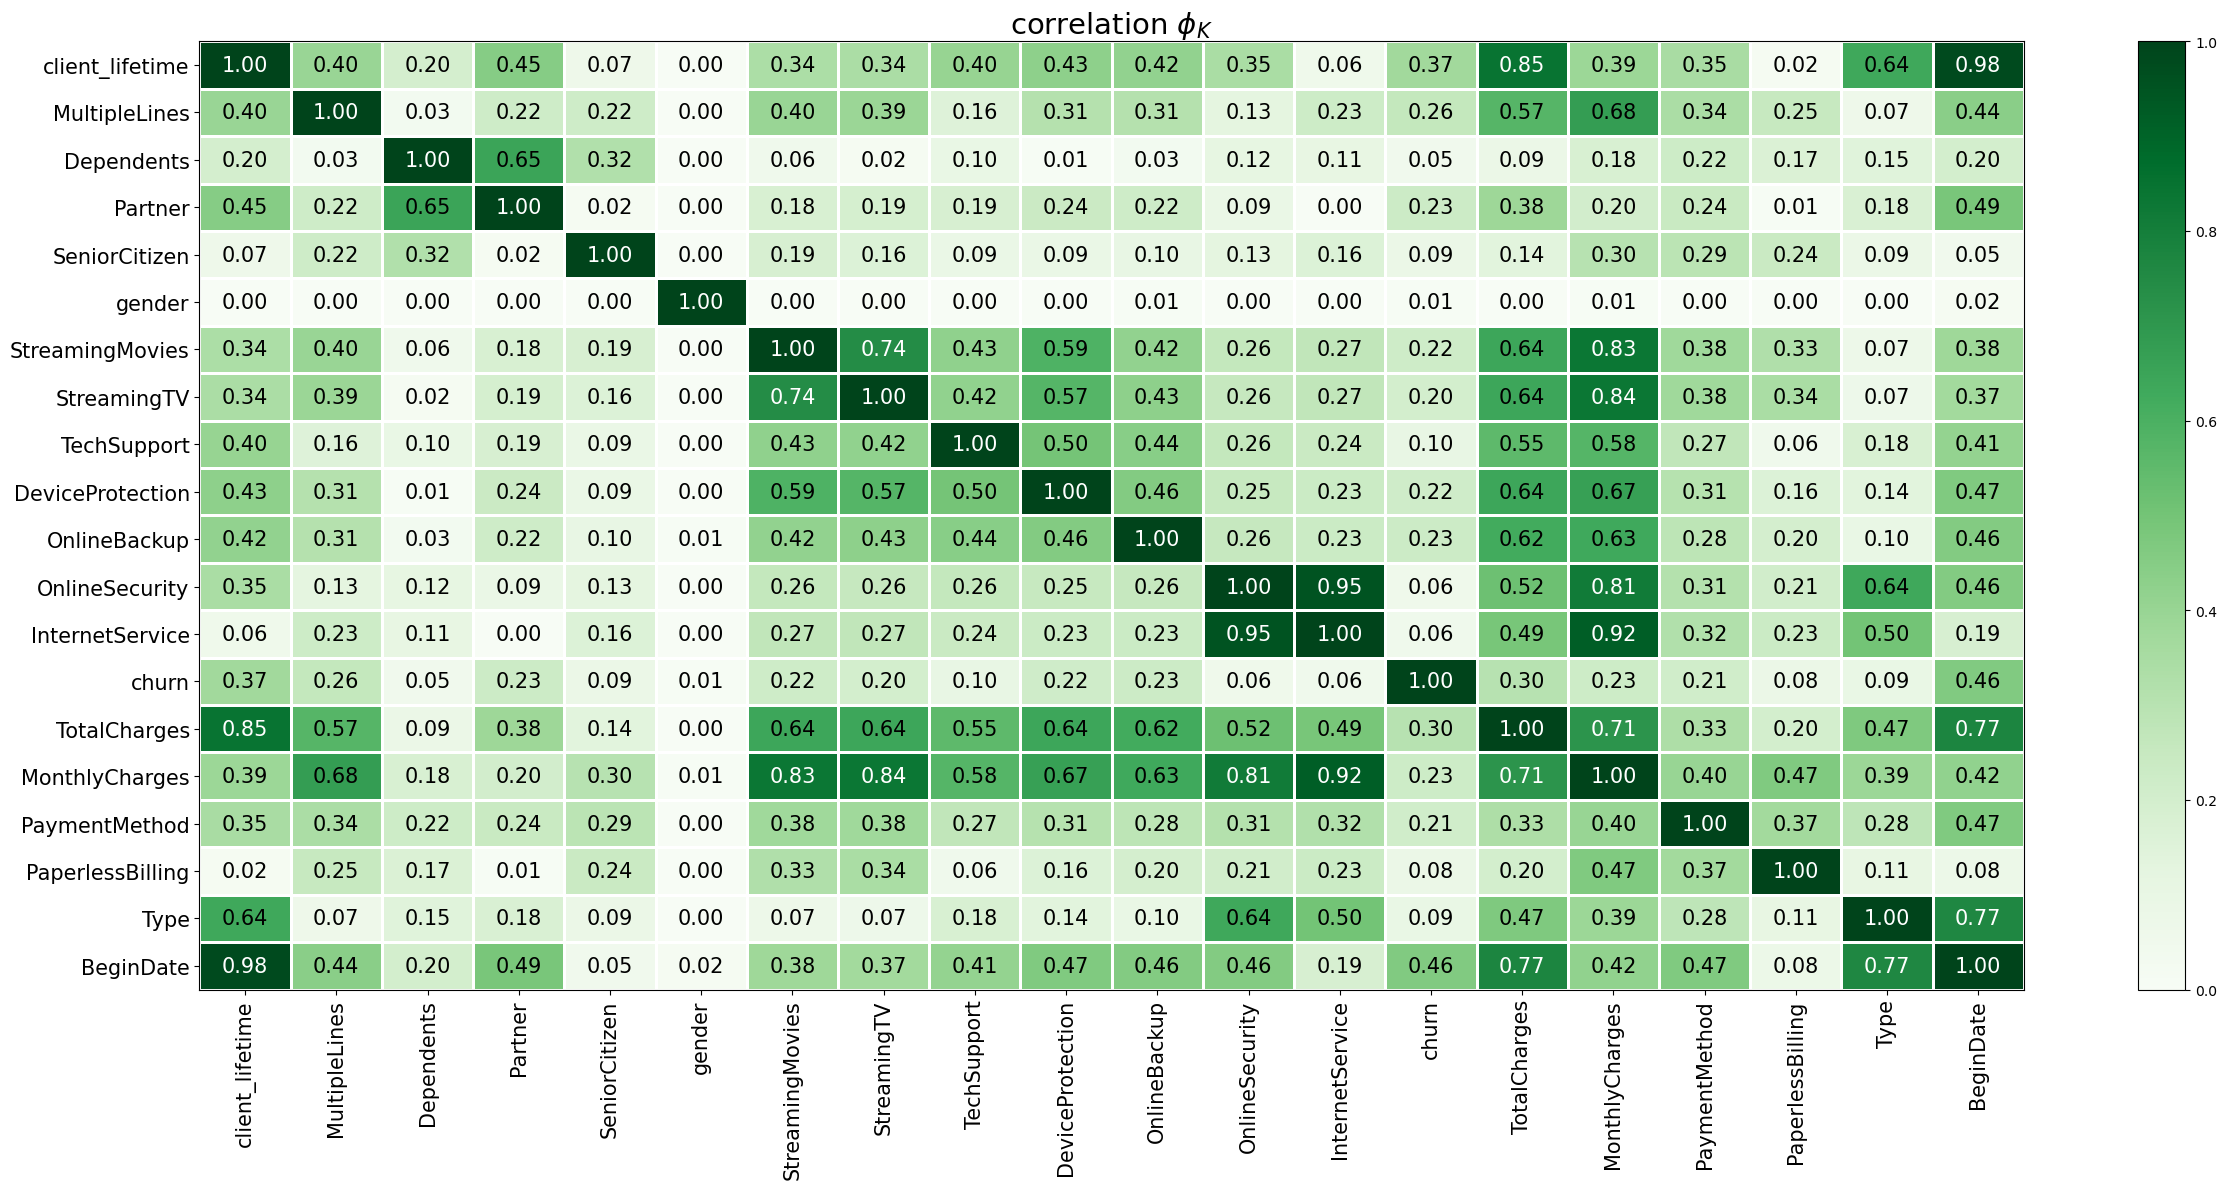

In [92]:
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1.5, 
                        figsize=(25, 12))


есть несколько наблюдений: 

1. мультиколленианость между всему дополнительнуыми услугами и ценой 
2. при этом они не влияют на целевую фичу
3. зато на целевую фичу сильно вляет дата начала контракта 

от этих фичей можно избавиться

In [97]:
df = df.drop(columns = ['gender'])

In [93]:
df = df.drop(columns = ['InternetService', 'OnlineSecurity', 
       'StreamingTV', 'StreamingMovies'])

In [ ]:
#df['begin_year'] = df['BeginDate'].dt.year
#df['begin_month'] = df['BeginDate'].dt.month
df = df.drop(columns = ['BeginDate'])

In [95]:
df.head()

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churn,OnlineBackup,DeviceProtection,TechSupport,gender,SeniorCitizen,Partner,Dependents,MultipleLines,client_lifetime
customerID,,,,,,,,,,,,,,,
7590-VHVEG,Month-to-month,1,Electronic check,29.85,31.04,0,1.0,0.0,0.0,0,0,1,0,0.0,31
5575-GNVDE,One year,0,Mailed check,56.95,2071.84,0,0.0,1.0,0.0,1,0,0,0,0.0,1036
3668-QPYBK,Month-to-month,1,Mailed check,53.85,226.17,0,1.0,0.0,0.0,1,0,0,0,0.0,123
7795-CFOCW,One year,0,Bank transfer (automatic),42.30,1960.60,0,0.0,1.0,1.0,1,0,0,0,0.0,1371
9237-HQITU,Month-to-month,1,Electronic check,70.70,353.50,0,0.0,0.0,0.0,0,0,0,0,0.0,153


In [98]:
cat_cols  = ['Type', 'PaperlessBilling', 'PaymentMethod',
             'OnlineBackup', 'DeviceProtection', 'TechSupport', 
             'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines']
num_cols = ['MonthlyCharges', 'TotalCharges', 'client_lifetime']
target = ['churn']

In [99]:
for col in cat_cols:
    df[col]= df[col].astype('str')

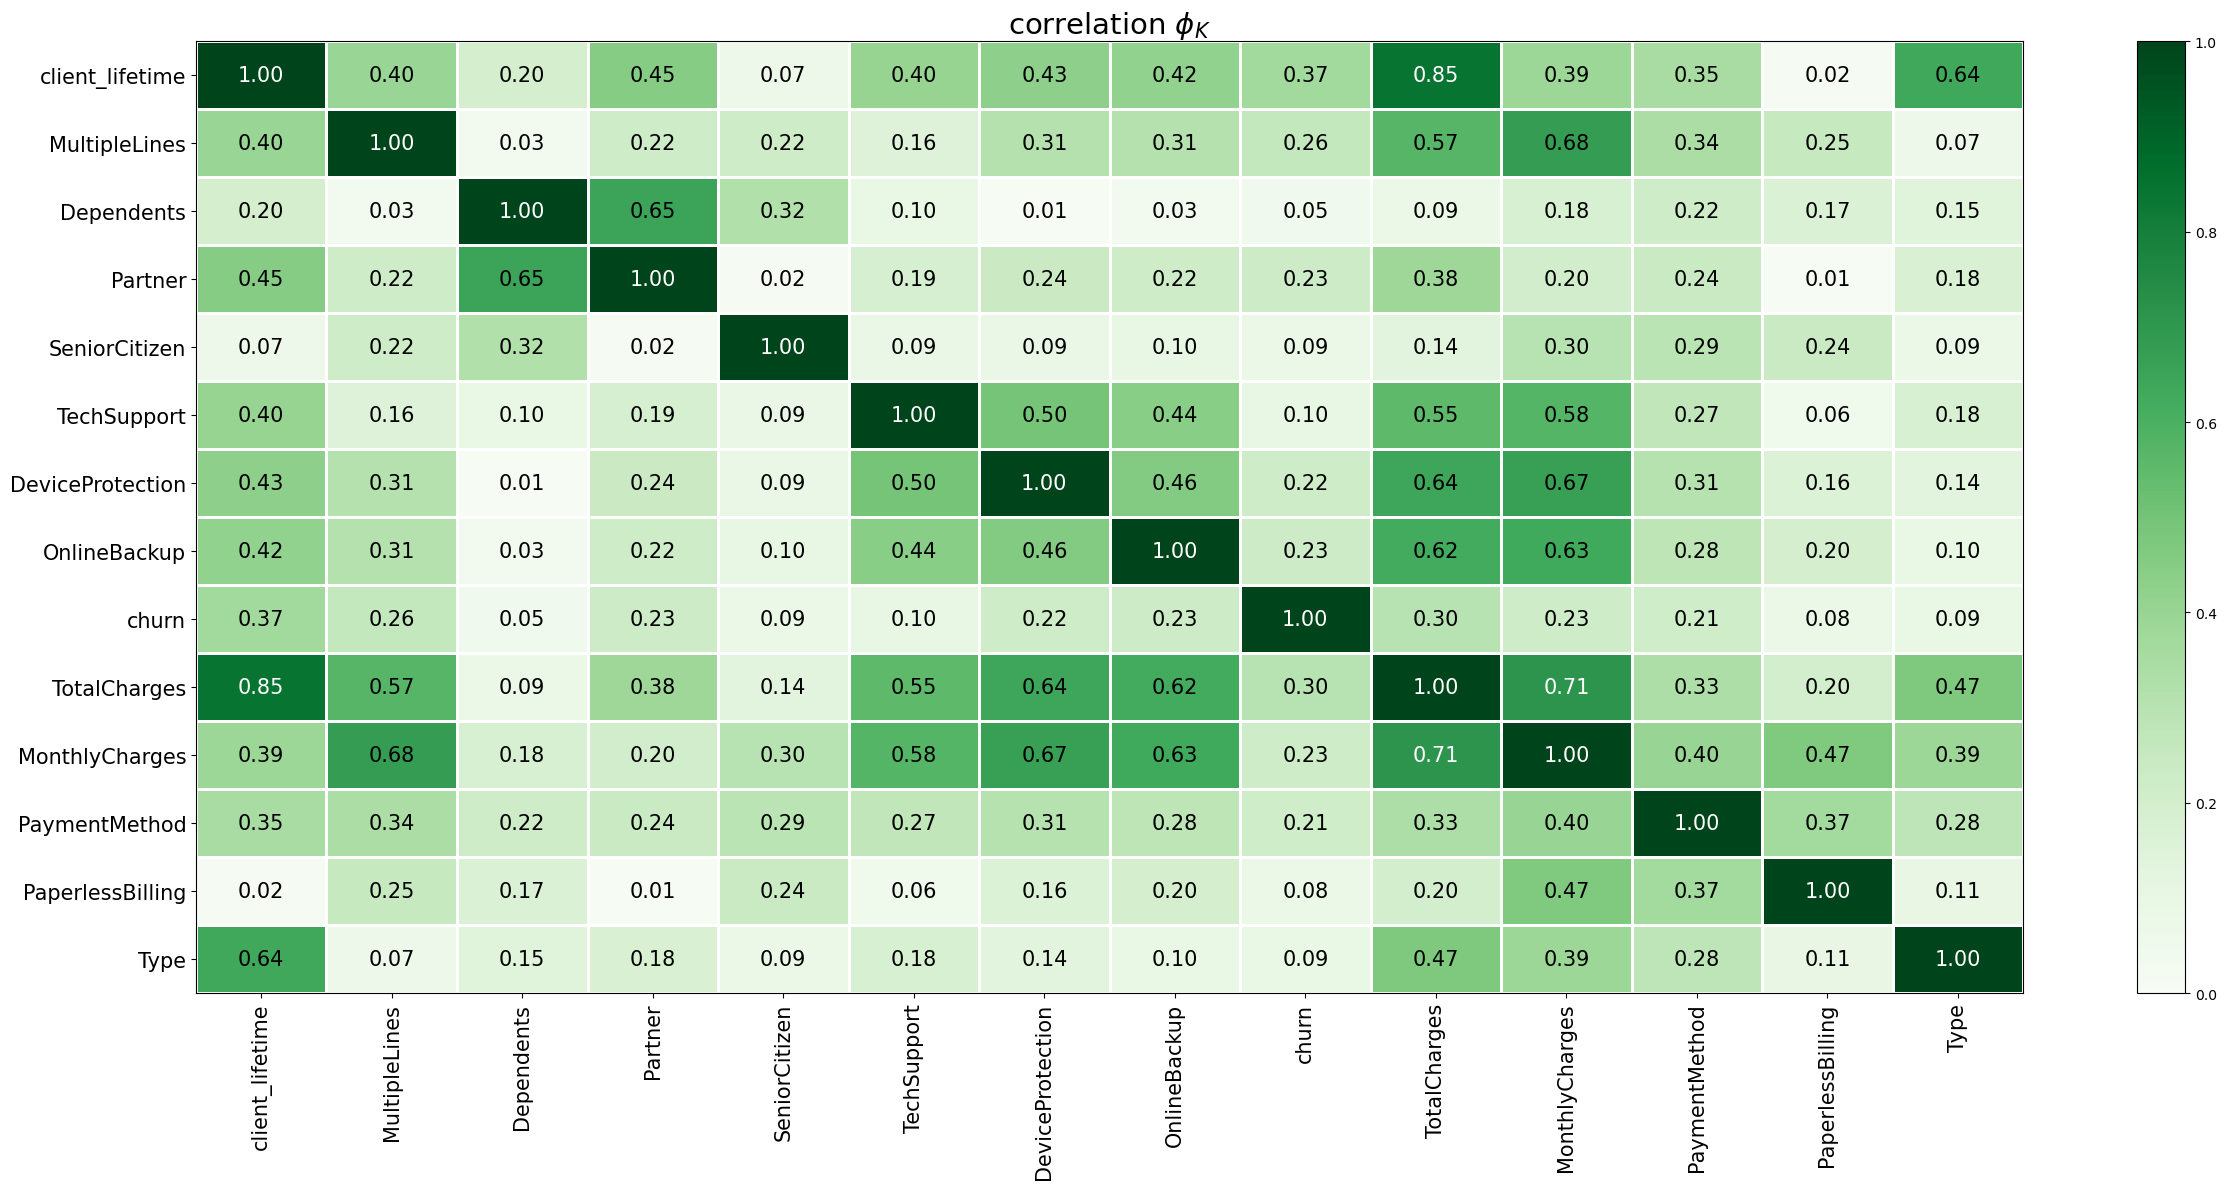

In [101]:
phik_overview = df.phik_matrix(interval_cols=num_cols)
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1.5, 
                        figsize=(25, 12))


In [103]:
X = df.drop(columns = ['churn'])
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE)

# modeling

## lr

In [104]:
col_transformer = make_column_transformer(
    (
        OneHotEncoder(drop='first', handle_unknown='ignore'),
        cat_cols
    ),
    (
        StandardScaler(), 
        num_cols
    ),
    remainder='passthrough',
    verbose_feature_names_out=False
)

In [105]:
lr = LogisticRegression()

In [106]:
clf = pipeline.Pipeline(
    steps=[("preprocessor", col_transformer), ("classifier", lr)]
)

In [107]:
scores = cross_val_score(clf, X_train, y_train, scoring='roc_auc', cv = 5)
print('roc auc cross val', scores.mean())

roc auc cross val 0.7527619674017558


<div class="alert alert-block alert-success">
✔️ <b>Ревью 3</b>: Молодец, что использовал конвейеры для обработки признаков это упростит кросс-валидацию и предотвратит утечку данных.
</div>

## ctb

In [108]:
model = CatBoostClassifier(random_seed=RANDOM_STATE, verbose= 100, 
                           cat_features= cat_cols , #auto_class_weights='Balanced',
                           custom_metric=['Logloss',
                                          'AUC:hints=skip_train~false'])

In [109]:
grid = {'learning_rate': [0.03, 0.1,],
        'depth': [4, 6, 10, 12], 
        'n_estimators' : [1000 , 1500, 2500]}

grid_search_result = model.grid_search(grid, 
                                       X=X_train, 
                                       y=y_train, cv=3)


0:	learn: 0.6680413	test: 0.6677129	best: 0.6677129 (0)	total: 11.8ms	remaining: 11.8s
100:	learn: 0.3250684	test: 0.3320913	best: 0.3320913 (100)	total: 811ms	remaining: 7.22s
200:	learn: 0.3107108	test: 0.3252514	best: 0.3252514 (200)	total: 1.63s	remaining: 6.49s
300:	learn: 0.3011016	test: 0.3208848	best: 0.3208763 (299)	total: 2.5s	remaining: 5.8s
400:	learn: 0.2895054	test: 0.3153753	best: 0.3153744 (392)	total: 3.19s	remaining: 4.77s
500:	learn: 0.2776616	test: 0.3074736	best: 0.3073711 (494)	total: 3.92s	remaining: 3.91s
600:	learn: 0.2658073	test: 0.2989693	best: 0.2989690 (599)	total: 4.66s	remaining: 3.09s
700:	learn: 0.2566565	test: 0.2935262	best: 0.2935199 (699)	total: 5.36s	remaining: 2.29s
800:	learn: 0.2466441	test: 0.2888924	best: 0.2888901 (797)	total: 6.1s	remaining: 1.52s
900:	learn: 0.2365619	test: 0.2847834	best: 0.2847834 (900)	total: 6.92s	remaining: 760ms
999:	learn: 0.2259119	test: 0.2771199	best: 0.2770678 (996)	total: 7.69s	remaining: 0us

bestTest = 0.2770

In [110]:
model.get_best_score()

{'learn': {'Logloss': 0.054053736034264645, 'AUC': 0.9995826952104979}}

In [122]:
model.get_params()

{'random_seed': 150523,
 'verbose': 100,
 'custom_metric': ['Logloss', 'AUC:hints=skip_train~false'],
 'cat_features': ['Type',
  'PaperlessBilling',
  'PaymentMethod',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'SeniorCitizen',
  'Partner',
  'Dependents',
  'MultipleLines'],
 'depth': 4,
 'iterations': 2500,
 'learning_rate': 0.1}

In [123]:
grid_search_result['params']

{'depth': 4, 'iterations': 2500, 'learning_rate': 0.1}

## best model test

In [124]:
model.predict_proba(X_test)[:,1]

array([0.01412353, 0.91306599, 0.10097713, ..., 0.18264793, 0.00741164,
       0.03037296])

In [125]:
roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

0.9261103755060082

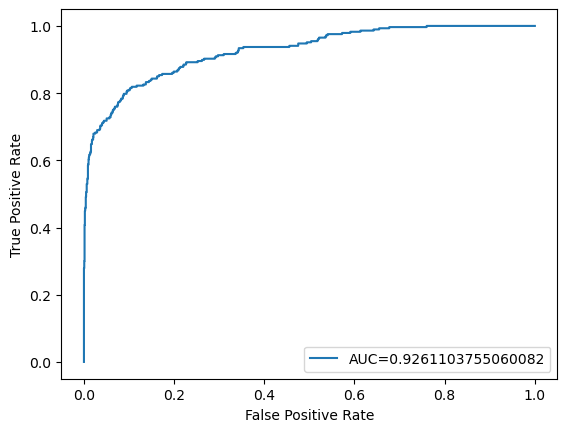

In [126]:
#define metrics
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [127]:
ctb_pred = model.predict(X_test)

In [128]:
accuracy_score(ctb_pred, y_test)

0.928896473265074

In [129]:
confusion_matrix(ctb_pred, y_test)

array([[1445,   99],
       [  26,  188]])

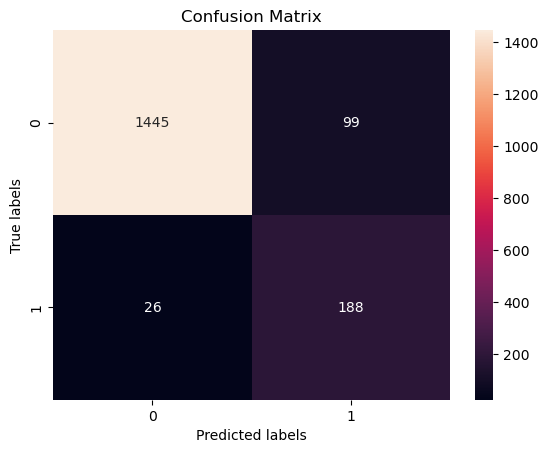

In [130]:
cm = confusion_matrix(ctb_pred, y_test)


import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);

избавились от переобученности модели, добавили ошибки (по большей части False Negative, не всегда можем расопзнать отток)

## feature importance

Text(0.5, 1.0, 'Feature Importance')

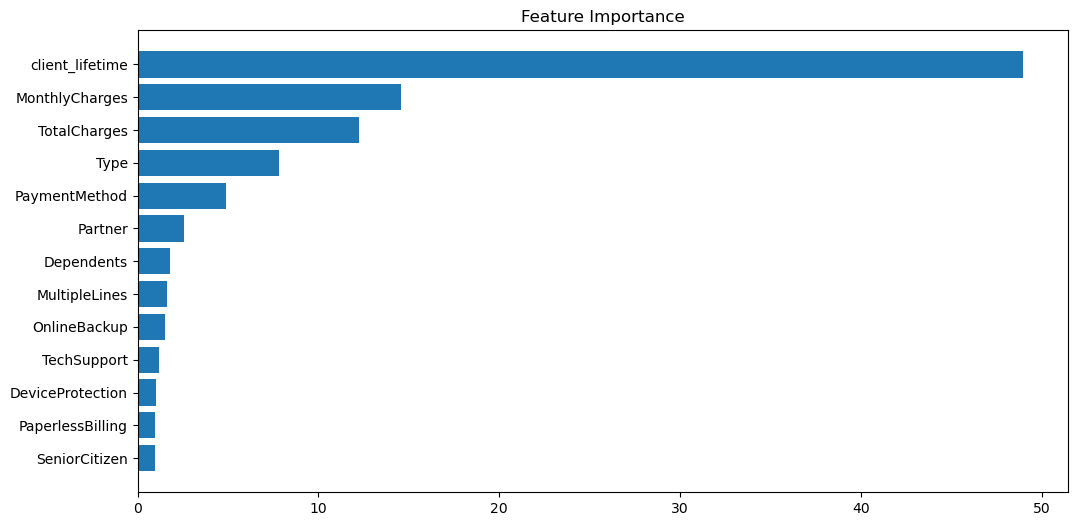

In [131]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

In [134]:
df.groupby('Type').agg({'churn':'mean'})

,churn
Type,
Month-to-month,0.105032
One year,0.212636
Two year,0.226113
